# Counting Stars (V2)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.utils.data import download_file
img_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)
hdulist = fits.open(img_file)
img = hdulist[0].data

In [3]:
max(img.flatten()), min(img.flatten())

(22918, 3759)

In [13]:
hdulist[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [10]:
hdulist.close()

## Scale of Point Source
underestimating the size of the star a little... around 4-5 pixels across?

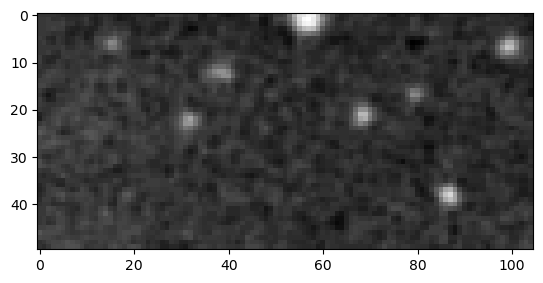

In [5]:
plt.imshow(img[150:200, 575:680], cmap='gray')

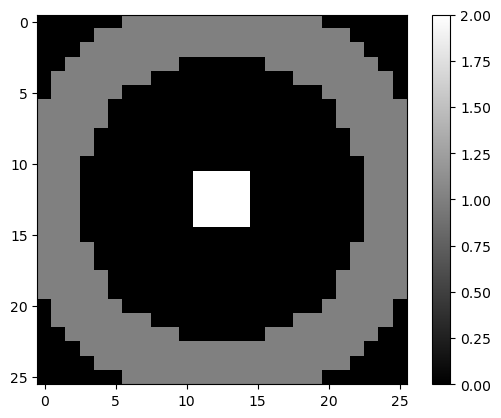

In [6]:
from PIL import Image
im_frame = Image.open('/home/saphio/Downloads/bigger_ann.png')
## originally, the annulus was a bit smaller, until I realized some of the 
## larger stars would result in the background being contaminated.

np_frame = np.array(im_frame)

annulus = np.zeros((26, 26))
for i in range(len(np_frame)):
    for j in range(len(np_frame[0])):
        if (np_frame[i, j, 0] == 0 and np_frame[i, j, 3] == 255):
            annulus[i, j] = 1 ## background
        elif (np_frame[i, j, 0] == 112):
            annulus[i, j] = 2 ## star

plt.imshow(annulus, cmap='gray')
plt.colorbar()

In [7]:
numInside = annulus[annulus == 2].shape[0]
numOutside = annulus[annulus == 1].shape[0]
numInside, numOutside

(16, 292)

## Sliding Annulus

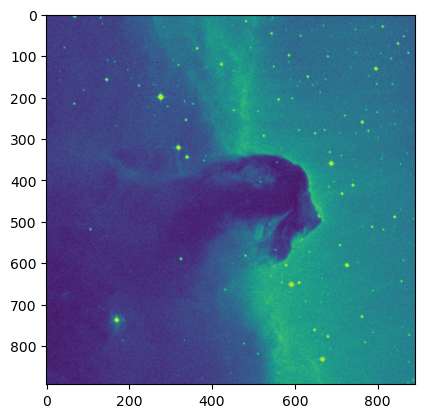

In [8]:
smallImg = img
plt.imshow(smallImg)

In [ ]:
mark = np.zeros(smallImg.shape)
marked = np.zeros(smallImg.shape)
for i in range(len(smallImg) - 24):
    for j in range(len(smallImg[0]) - 24):
        ic = 0
        ec = 0
        for x in range(25):
            for y in range(25):
                if (annulus[x, y] == 2):
                    ic += smallImg[i + x, j + y]
                elif (annulus[x, y] == 1):
                    ec += smallImg[i + x, j + y]
        ic /= numInside
        ec /= numOutside
        mark[i, j] = ic/ec
        if (ic > 2 * ec):
            marked[i + 12, j + 12] = 100
markHist = plt.hist(mark, bins='auto')

In [ ]:
np.mean(mark), np.std(mark), np.max(mark)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].imshow(marked, cmap='gray') ## stars that were detected using annulus
axes[1].imshow(smallImg, cmap='gray', vmin=3759, vmax = 22918) ## original 200 px * 200 px portion in the top left

### Sampling

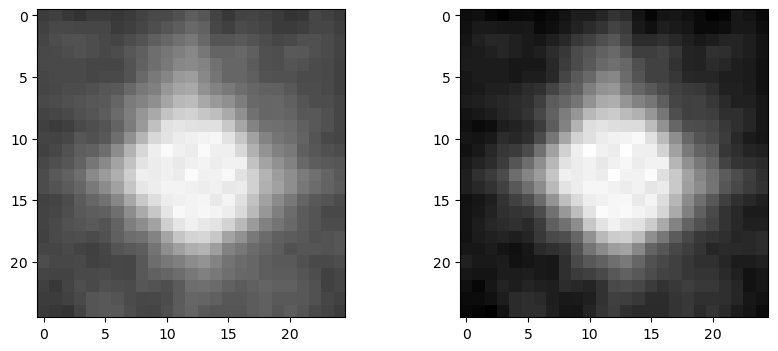

In [251]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[1].imshow(img[725:750, 158:183], cmap='gray')

axes[0].imshow(img[725:750, 158:183], cmap='gray', vmin=3759, vmax = 22918)

In [206]:
testMark = np.zeros((26, 26))
testImg = img[725:751, 158:184]

ic, ec = 0, 0

for i in range(26):
    for j in range(26):
        if (annulus[i, j] == 2):
            ic += testImg[i, j]
        elif (annulus[i, j] == 1):
            ec += testImg[i, j]

ic /= numInside
ec /= numOutside

print(ic/ec)

2.1825971328349767


raw inside count: 342644   raw outside count: 3358445
avg inside count: 21415.25   avg outside count: 11825.510563380281
ratio: 1.810936609055679


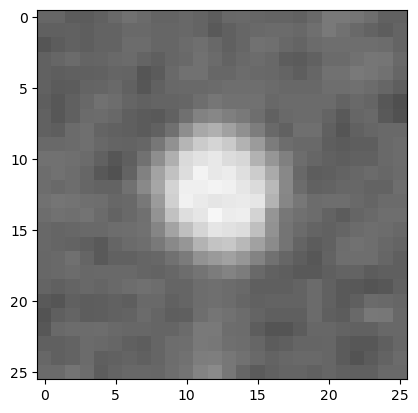

In [240]:
testImg2 = img[248:274, 751:777]
plt.imshow(testImg2, cmap='gray', vmin = 3759, vmax = 22918) 
## the default image plotted will scale to the min and max of this snippet;
## setting vmin and vmax scales it back to how it looks in the original picture.

ic2, ec2 = 0, 0 ## inside/internal and outside/external counts

for i in range(26):
    for j in range(26):
        if (annulus[i, j] == 2): ## the center region for the star 
            ic2 += testImg2[i, j]
        elif (annulus[i, j] == 1): ## the background
             ec2 += testImg2[i, j]

print('raw inside count:', ic2, '  raw outside count:', ec2)
                
ic2 /= numInside ## average
ec2 /= numOutside ## average

print('avg inside count:', ic2, '  avg outside count:', ec2)
print('ratio:', ic2/ec2)

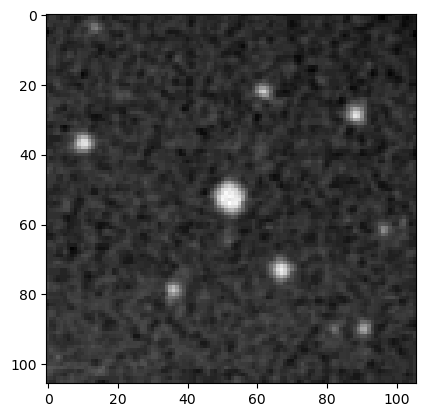

In [237]:
plt.imshow(img[208:314, 711:817], cmap='gray')

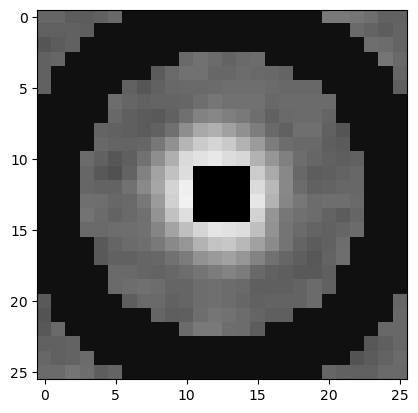

In [221]:
testOverlay = np.zeros((26, 26))
for i in range(26):
    for j in range(26):
        if (annulus[i, j] == 2):
            testOverlay[i, j] = 3000
        elif (annulus[i, j] == 1):
            testOverlay[i, j] = 5000
        else:
            testOverlay[i, j] = testImg2[i, j]
            
plt.imshow(testOverlay, cmap='gray', vmin = 3759, vmax = 22918)